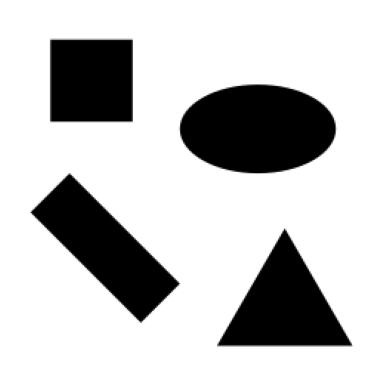

In [305]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

original_image = mpimg.imread('figures/figures.png')

image = np.dot(original_image[..., :3], [0.2989, 0.5870, 0.1140])

plt.imshow(image, cmap="gray")
plt.axis("off")
plt.show()

In [306]:
image.shape

(250, 250)

In [307]:
mask = np.zeros(image.shape)

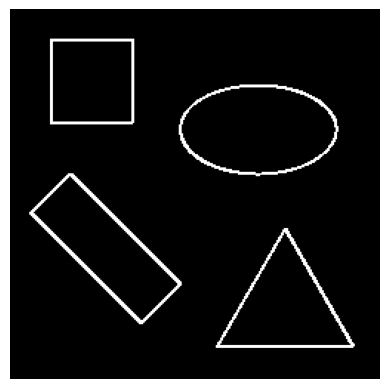

In [308]:
delta = 0.01

for i in range(image.shape[0]):
    for j in range(image.shape[1] - 1):
        if abs(image[i,j] - image[i,j+1]) >= delta:
            mask[i,j+1] = 1
            
for i in range(image.shape[0] - 1):
    for j in range(image.shape[1]):
        if abs(image[i,j] - image[i+1,j]) >= delta:
            mask[i+1,j] = 1
            
plt.imshow(mask, cmap="gray")
plt.axis("off")
plt.show()

---
### Versión 2

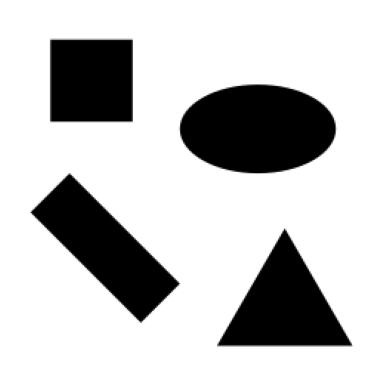

In [309]:
original_image = mpimg.imread('figures/figures.png')

image = np.dot(original_image[..., :3], [0.2989, 0.5870, 0.1140])

plt.imshow(image, cmap="gray")
plt.axis("off")
plt.show()

In [310]:
mask = np.zeros(image.shape)

In [311]:
# valor más repetido
def mas_repetido(image, option=None, delta=None):   # option: 'min' | 'max'
    minimo = image.min()
    maximo = image.max()
    
    if option == None:
        valores, conteos = np.unique(image, return_counts=True)
        rep = valores[np.argmax(conteos)]
        return rep
    elif option == 'min':   # min: mas oscuros
        rango_min = minimo + delta
        rango = image[(image >= minimo) & (image <= rango_min)]
        valores, conteos = np.unique(rango, return_counts=True)
        rep = valores[np.argmax(conteos)]
        return rep
    elif option == 'max':   # min: mas claros
        rango_max = maximo - delta
        rango = image[(image <= maximo) & (image >= rango_max)]
        valores, conteos = np.unique(rango, return_counts=True)
        rep = valores[np.argmax(conteos)]
        return rep

In [312]:
min_rep = mas_repetido(image, 'min', 0.2)
max_rep = mas_repetido(image, 'max', 0.2)

In [313]:
# definir tono actual
def tono(valor, delta, min_rep, max_rep):
    if abs(valor - min_rep) <= delta: return 0
    elif abs(valor - max_rep) <= delta: return 1

In [314]:
delta = 0.1
delta1 = 0.1

# izquierda -> derecha | arriba -> abajo
for i in range(image.shape[0]):
    for j in range(image.shape[1] - 1):
        tono_actual = tono(image[i,j], delta1, min_rep, max_rep)
        if abs(image[i,j] - image[i,j+1]) > delta:
            if tono_actual == 1:
                mask[i,j+1] = 1
            elif tono_actual == 0:
                mask[i,j] = 1
                
# arriba -> abajo | izquierda -> derecha
for j in range(image.shape[1]):
    for i in range(image.shape[0] - 1):
        tono_actual = tono(image[i,j], delta1, min_rep, max_rep)
        if abs(image[i,j] - image[i+1,j]) > delta:
            if tono_actual == 1:
                mask[i+1,j] = 1
            elif tono_actual == 0:
                mask[i,j] = 1

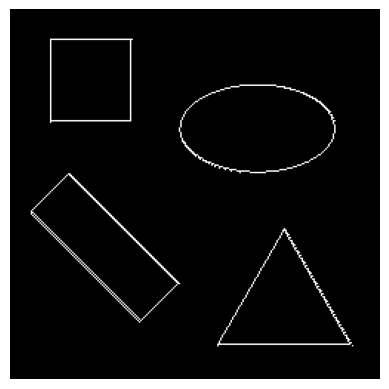

In [315]:
plt.imshow(mask, cmap="gray")
plt.axis("off")
plt.show()